In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import copy, math
import pandas as pd

In [32]:
def dataframe_to_xy(dataframe):
    data = dataframe.to_numpy()
    y = data[:, 0]
    X = data[:, 1:]
    return X, y

In [58]:
xy_dataframe = pd.read_stata('binary.dta') # https://stats.oarc.ucla.edu/stata/dae/logistic-regression/

In [35]:
xy_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 6.4 KB


In [34]:
X, y = dataframe_to_xy(xy_dataframe)

In [83]:
x_train = X[:-10, :]
x_future = X[-10:, :]
y_train = y[:-10]
y_future = y[-10:]

In [71]:
def draw_scatter_plot_3d(x1, x2, x3, y, x1_label='X axis', x2_label='Y axis', x3_label='Z axis', y_labels=['0', '1']):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if label == 0 else 'blue' for label in y]
    ax.scatter(x1, x2, x3, c=colors, s=50, alpha=0.8)
    ax.set_xlabel(x1_label)
    ax.set_ylabel(x2_label)
    ax.set_zlabel(x3_label)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=y_labels[0], markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label=y_labels[1], markerfacecolor='blue', markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='best')
    plt.show()

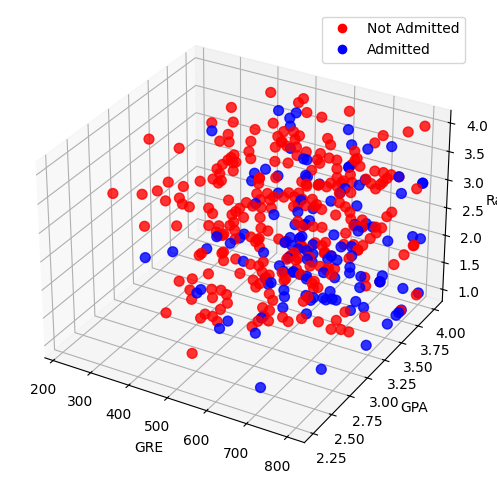

In [70]:
draw_scatter_plot_3d(X[:, 0], X[:, 1], X[:, 2], y, 'GRE', 'GPA', 'Rank', ['Not Admitted', 'Admitted'])

In [42]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [60]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        cost +=  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
    cost /= m
    return cost

In [44]:
def compute_gradient(X, y, w, b):
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [45]:
def gradient_descent(X, y, w_in, b_in=0, alpha=0.01, num_iterations=10000):
    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # save cost at each iteration
        if i < 100000: # prevent resource exhaustion
            cost_history.append(compute_cost(X, y, w, b))
        # print cost at 10 intervals, or each iteration if < 10
        if i % math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:.2e}",
                  f"w: {w}, b: {b:.3e}")
        if math.isnan(cost_history[-1]):
            raise ValueError(f"Cost is not a number at iteration {i}.")
    return w, b, cost_history

In [46]:
np.set_printoptions(precision=3, suppress=True)

In [47]:
def z_score_normalize(X):
    m,n = X.shape
    z_scores = np.zeros((m, n))
    for i in range(n):
        x_mean = np.mean(X[:, i])
        x_std_dev = np.std(X[:, i])
        z_scores[:, i] = (X[:, i] - x_mean) / x_std_dev
    return z_scores

In [48]:
num_features = x_train.shape[1]
w = np.zeros(num_features)
x_train_normalized = z_score_normalize(x_train)

In [50]:
w, b, J_history = gradient_descent(x_train_normalized, y_train, w, 0, 0.1)

Iteration    0: Cost 6.87e-01 w: [ 0.00847098  0.00811084 -0.01142999], b: -1.872e-02
Iteration 1000: Cost 5.70e-01 w: [ 0.26441535  0.28520981 -0.54098687], b: -8.841e-01
Iteration 2000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 3000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 4000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 5000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 6000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 7000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 8000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01
Iteration 9000: Cost 5.70e-01 w: [ 0.2644147   0.28521053 -0.54098723], b: -8.841e-01


In [51]:
def saveModel(w, b):
    filename = 'model.csv'
    with open(filename, 'wb') as f:
        np.savetxt(f, w, delimiter=',')
    with open(filename, 'ab') as f:
        np.savetxt(f, [b], delimiter=',')

In [52]:
saveModel(w, b)

In [55]:
x_string = ''
wx_string = ''
for i in range(w.shape[0]):
    if i > 0:
        x_string += ', '
        wx_string += ' + '
    x_string += f'x_{i}'
    wx_string += f'{w[i]:.2f} x_{i}'
print(f'f_wb({x_string}) = {wx_string} + {b:.2f}')

f_wb(x_0, x_1, x_2) = 0.26 x_0 + 0.29 x_1 + -0.54 x_2 + -0.88


In [76]:
fx = np.zeros(x_train_normalized.shape[0])
for i in range(x_train_normalized.shape[0]):
    fx[i] = sigmoid(np.dot(x_train_normalized[i], w) + b)
    fx[i] = 0 if fx[i] < 0.5 else 1

In [65]:
np.savetxt('fx.csv', fx, delimiter=',')

In [81]:
def draw_scatter_plot_3d_with_fx(x1, x2, x3, y, fx, x1_label='X axis', x2_label='Y axis', x3_label='Z axis'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    colors_actual = ['red' if label == 0 else 'blue' for label in y]
    ax.scatter(x1, x2, x3, c=colors_actual, s=50, alpha=0.4, label='Actual')
    colors_predicted = ['pink' if label == 0 else 'lightblue' for label in fx]
    ax.scatter(x1, x2, x3, c=colors_predicted, s=20, alpha=0.8, label='Predicted', marker='^')
    ax.set_xlabel(x1_label)
    ax.set_ylabel(x2_label)
    ax.set_zlabel(x3_label)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Actual 0', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Actual 1', markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='^', color='w', label='Predicted 0', markerfacecolor='pink', markersize=8),
        Line2D([0], [0], marker='^', color='w', label='Predicted 1', markerfacecolor='lightblue', markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='best')
    plt.show()

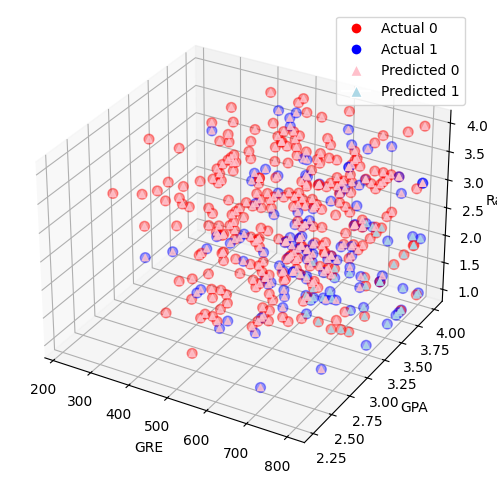

In [82]:
draw_scatter_plot_3d_with_fx(x_train[:, 0], x_train[:, 1], x_train[:, 2], y_train, fx, 'GRE', 'GPA', 'Rank')

In [84]:
x_future_normalized = z_score_normalize(x_future)

In [85]:
fx_future = np.zeros(x_future_normalized.shape[0])
for i in range(x_future_normalized.shape[0]):
    fx_future[i] = sigmoid(np.dot(x_train_normalized[i], w) + b)
    fx_future[i] = 0 if fx[i] < 0.5 else 1

In [86]:
for i in range(x_future_normalized.shape[0]):
    print(f"{int(x_future_normalized[i, 0])}: |{fx_future[i]:.2f} - {y_future[i]}| = {abs(fx_future[i] - y_future[i]):.2f}")
cost_predict = compute_cost(x_future_normalized, y_future, w, b)
print(f"Cost of future predictions: {cost_predict:.2f}")

1: |0.00 - 1.0| = 1.00
0: |0.00 - 1.0| = 1.00
0: |1.00 - 1.0| = 0.00
0: |0.00 - 1.0| = 1.00
-1: |0.00 - 1.0| = 1.00
0: |0.00 - 0.0| = 0.00
0: |0.00 - 0.0| = 0.00
-1: |0.00 - 0.0| = 0.00
0: |0.00 - 0.0| = 0.00
0: |1.00 - 0.0| = 1.00
Cost of future predictions: 0.79


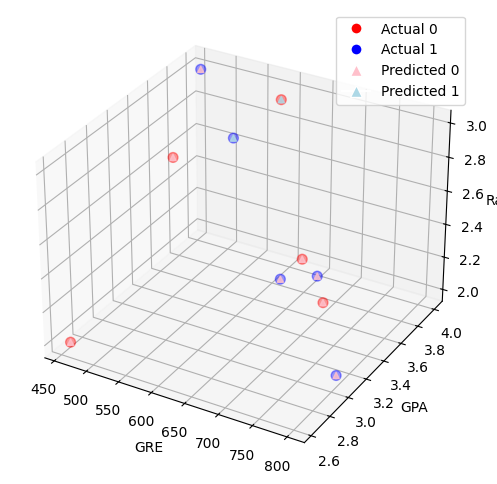

In [87]:
draw_scatter_plot_3d_with_fx(x_future[:, 0], x_future[:, 1], x_future[:, 2], y_future, fx_future, 'GRE', 'GPA', 'Rank')